# Preparação do ambiente

- https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2023/

In [1]:
# instalando bibliotecas
!pip install -q wradlib ultraplot cartopy salem rasterio pyproj geopandas arm_pyart bmi-topography

# importando bibliotecas
import wradlib as wrl
import xarray as xr
import ultraplot as uplt
import cartopy.crs as ccrs
import time
import numpy as np
import salem
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt
import pandas as pd
import geopy
from geopy import distance
import salem
from bmi_topography import Topography
import warnings
warnings.filterwarnings("ignore")

# montando drive
from google.colab import drive
drive.mount('/content/drive')

# caminho do diretório onde esta o código
dir = '/content/drive/MyDrive/6-COMPRA_RADAR/02_CODIGOS'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 

/usr/local/lib/python3.11/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


Mounted at /content/drive


# Funções

In [2]:
import time
#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label, linestyle, largura):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                           aneis (lista): tamanho do raio do círculo em km
                           lon_r (float): valor da longitude do centro do círculo em graus
                           lat_r (float): valor da latitude do centro do círculo em graus
                           color (str): cor do raio do círculo
                           label (str): legenda

    Parâmetros de saída:
                         latitude e longitude que delimita os círculos de distância centrado no radar e plota os círculos

    Exemplo:
             evm_plota_aneis_em_geral([100], -45.97279, -23.600795, 'gray', label='Radar: 100 km')
    """
    import geopy                             # Biblioteca para geocodificação
    from geopy import distance               # Função para calculo de distância

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, ls=linestyle, lw=largura)

#-----------------------------------------------------------------------------------
#  Função que plota circulos de distância em geral
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral_painel(aneis, lon_r, lat_r, color, label, linestyle, largura, axx):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                           aneis (lista): tamanho do raio do círculo em km
                           lon_r (float): valor da longitude do centro do círculo em graus
                           lat_r (float): valor da latitude do centro do círculo em graus
                           color (str): cor do raio do círculo
                           label (str): legenda

    Parâmetros de saída:
                         latitude e longitude que delimita os círculos de distância centrado no radar e plota os círculos

    Exemplo:
             evm_plota_aneis_em_geral([100], -45.97279, -23.600795, 'gray', label='Radar: 100 km')
    """
    import geopy                             # Biblioteca para geocodificação
    from geopy import distance               # Função para calculo de distância

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))
    for i, dis in enumerate(aneis):
        xpts = []
        ypts = []
        for az in range(361):
            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)
        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax[axx].plot(lons[i,:], lats[i,:], color=color, label= label, ls=linestyle, lw=largura)

# Figura com a localização de todos radares de MG - LNA BANDA-S

CPU times: user 12.3 s, sys: 261 ms, total: 12.6 s
Wall time: 22.9 s


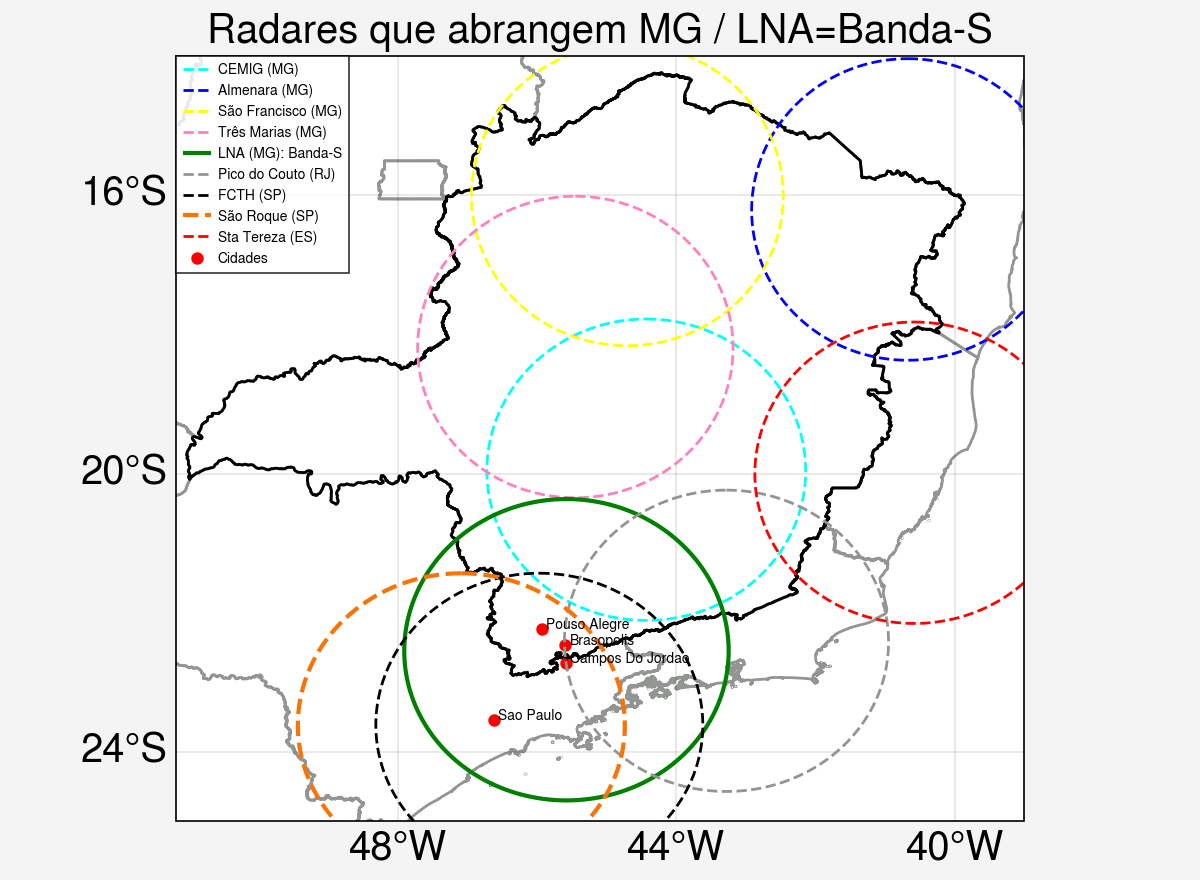

In [3]:
%%time
#==========================================================================#
#                         LEITURA DOS DADOS
#==========================================================================#
# limites da figura
latmin, latmax, lonmin, lonmax = -23, -14, -50, -40
latmin, latmax, lonmin, lonmax = -23, -14, -51.2, -39
latmin, latmax, lonmin, lonmax = -25, -14, -51.2, -39

# leitura do dado
#ds = xr.open_dataset('https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land').sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

#==========================================================================#
#                           PLOTA FIGURA
#==========================================================================#
# moldura da figura
fig, ax = uplt.subplots(figsize=(6.,4.4), tight=True, proj='pcarree')

# mapa de contornos preenchidos
"""
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'],
                   cmap='terrain',
                   levels=pplt.arange(0, 3000, 10))
"""

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=4, lonlines=4,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title='Radares que abrangem MG / LNA=Banda-S',
          small='20px', large='20px')

# contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1.0)

# contorno de MG
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/UFs/MG/MG_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# localização dos radares: MG
lon_radar_cemig, lat_radar_cemig = -44.4344, -19.9452
lon_radar_almenara, lat_radar_almenara = -40.67425, -16.20203
lon_radar_saofrancisco, lat_radar_saofrancisco = -44.7061, -15.9930
lon_radar_tresmarias, lat_radar_tresmarias = -45.4546, -18.1798
lon_radar_lna, lat_radar_lna = -45.5825, -22.5344

# localização dos radares: RJ
lon_radar_picocouto, lat_radar_picocouto = -43.2806, -22.4060

# localização dos radares: SP
lon_radar_fcth, lat_radar_fcth = -45.97279, -23.600795
lon_radar_saoroque, lat_radar_saoroque = -47.0943, -23.602

# localização dos radares: ES
lon_radar_statereza, lat_radar_statereza = -40.5794, -19.98887
#lon_radar_salvador, lat_radar_salvador = -38.3313, -12.8761

# anel do radar: MG
evm_plota_aneis_em_geral([240], lon_radar_cemig, lat_radar_cemig, 'cyan', label='CEMIG (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_almenara, lat_radar_almenara, 'blue', label='Almenara (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_saofrancisco, lat_radar_saofrancisco, 'yellow', label='São Francisco (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_tresmarias, lat_radar_tresmarias, 'pink', label='Três Marias (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_lna, lat_radar_lna, 'green', label='LNA (MG): Banda-S', linestyle='-', largura=1.5)

# anel do radar: RJ
evm_plota_aneis_em_geral([240], lon_radar_picocouto, lat_radar_picocouto, 'gray', label='Pico do Couto (RJ)', linestyle='--', largura=1.)

# anel do radar: SP
evm_plota_aneis_em_geral([240], lon_radar_fcth, lat_radar_fcth, 'black', label='FCTH (SP)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_saoroque, lat_radar_saoroque, 'orange', label='São Roque (SP)', linestyle='--', largura=1.5)

# anel do radar: ES
evm_plota_aneis_em_geral([240], lon_radar_statereza, lat_radar_statereza, 'red', label='Sta Tereza (ES)', linestyle='--', largura=1.)
#evm_plota_aneis_em_geral([240], lon_radar_salvador, lat_radar_salvador , 'green', label='Salvador')

# Plota granizo
#ax.scatter(df_granizo['lon'].values, df_granizo['lat'].values,
#           transform=ccrs.PlateCarree(),
#           marker='x', s=40, color='b',
#           label='Granizo')

#--------------------------#
#     plota cidades
#--------------------------#
# lendo o arquivo CSV
df = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')

# removendo espaço em branco
df['cidade'] = df['cidade'].str.strip()

# removendo espaço em branco
df['uf'] = df['uf'].str.strip()

# listas com os nomes das cidades que serão plotadas no mapa
cidades = ['SAO PAULO', 'POUSO ALEGRE', 'BRASOPOLIS', 'CAMPOS DO JORDAO']

# cria um dataframe vazio
df_cidades = pd.DataFrame()

# loop da lista de cidades
for cidade in cidades:

    # seleciona a cidade
    df_atual = df[ df['cidade'] == cidade][['lat', 'lon']]

    # insere a latitude e longitude da cidade no DataFrame df_cidades
    df_cidades = pd.concat([df_cidades, df_atual])

# acrescenta uma coluna com os nomes das cidades
df_cidades['cidade'] = cidades

# plota a localização das cidades com os nomes
ax.scatter(df_cidades['lon'].values, df_cidades['lat'].values, transform=ccrs.PlateCarree(), marker='o', s=15, color='red', label='Cidades') # localização das cidades
for ilon, ilat, icidade in zip( list(df_cidades['lon']), list(df_cidades['lat']), list(df_cidades['cidade']) ): plt.text(ilon+0.06, ilat, icidade.title(), fontsize=5) # nome das cidades

# adiciona legenda
ax.legend(loc='ul', ncols=1, frameon=True, prop={'size':5})

# barra de cores
#fig.colorbar(map1, loc='r', label='Elevação (m)', ticks=600, ticklabelsize=13, labelsize=13, space=-1.3)

# salva figuras
fig.save(f'{dir}/output/codigo_1/Fig_1a_localizacao_radares_LNA_BandaS.jpg', dpi=300)

# Figura com a localização de todos radares de MG - LNA BANDA-X

CPU times: user 12.2 s, sys: 197 ms, total: 12.4 s
Wall time: 21.6 s


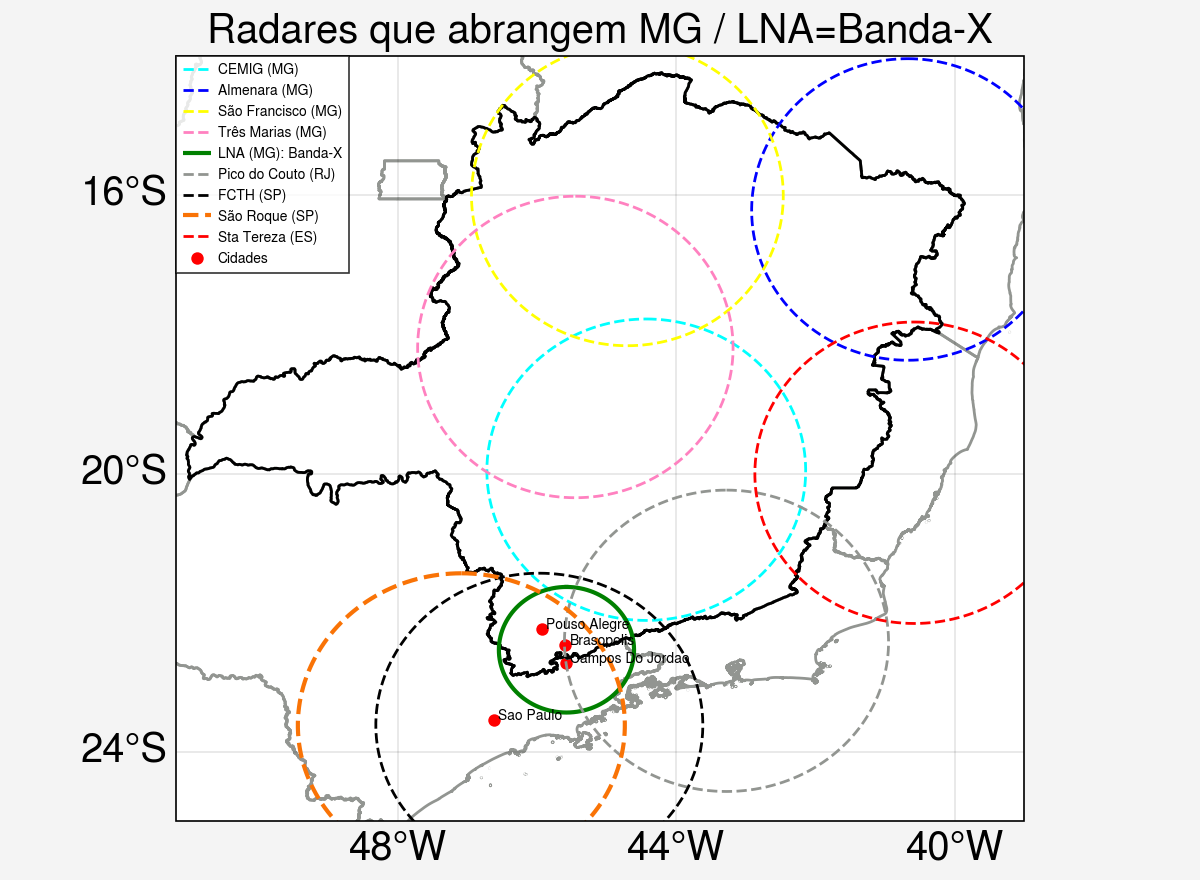

In [4]:
%%time
#==========================================================================#
#                         LEITURA DOS DADOS
#==========================================================================#
# limites da figura
latmin, latmax, lonmin, lonmax = -23, -14, -50, -40
latmin, latmax, lonmin, lonmax = -23, -14, -51.2, -39
latmin, latmax, lonmin, lonmax = -25, -14, -51.2, -39

# leitura do dado
#ds = xr.open_dataset('https://pae-paha.pacioos.hawaii.edu/thredds/dodsC/srtm30plus_v11_land').sel(lat=slice(latmin,latmax), lon=slice(lonmin,lonmax))

#==========================================================================#
#                           PLOTA FIGURA
#==========================================================================#
# moldura da figura
fig, ax = uplt.subplots(figsize=(6.,4.4), tight=True, proj='pcarree')

# mapa de contornos preenchidos
"""
map1 = ax.contourf(ds['lon'],
                   ds['lat'],
                   ds['elev'],
                   cmap='terrain',
                   levels=pplt.arange(0, 3000, 10))
"""

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=4, lonlines=4,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          title='Radares que abrangem MG / LNA=Banda-X',
          small='20px', large='20px')

# contorno dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1.0)

# contorno de MG
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/UFs/MG/MG_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1.0)

# localização dos radares: MG
lon_radar_cemig, lat_radar_cemig = -44.4344, -19.9452
lon_radar_almenara, lat_radar_almenara = -40.67425, -16.20203
lon_radar_saofrancisco, lat_radar_saofrancisco = -44.7061, -15.9930
lon_radar_tresmarias, lat_radar_tresmarias = -45.4546, -18.1798
lon_radar_lna, lat_radar_lna = -45.5825, -22.5344

# localização dos radares: RJ
lon_radar_picocouto, lat_radar_picocouto = -43.2806, -22.4060

# localização dos radares: SP
lon_radar_fcth, lat_radar_fcth = -45.97279, -23.600795
lon_radar_saoroque, lat_radar_saoroque = -47.0943, -23.602

# localização dos radares: ES
lon_radar_statereza, lat_radar_statereza = -40.5794, -19.98887
#lon_radar_salvador, lat_radar_salvador = -38.3313, -12.8761

# anel do radar: MG
evm_plota_aneis_em_geral([240], lon_radar_cemig, lat_radar_cemig, 'cyan', label='CEMIG (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_almenara, lat_radar_almenara, 'blue', label='Almenara (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_saofrancisco, lat_radar_saofrancisco, 'yellow', label='São Francisco (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_tresmarias, lat_radar_tresmarias, 'pink', label='Três Marias (MG)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([100], lon_radar_lna, lat_radar_lna, 'green', label='LNA (MG): Banda-X', linestyle='-', largura=1.5)

# anel do radar: RJ
evm_plota_aneis_em_geral([240], lon_radar_picocouto, lat_radar_picocouto, 'gray', label='Pico do Couto (RJ)', linestyle='--', largura=1.)

# anel do radar: SP
evm_plota_aneis_em_geral([240], lon_radar_fcth, lat_radar_fcth, 'black', label='FCTH (SP)', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([240], lon_radar_saoroque, lat_radar_saoroque, 'orange', label='São Roque (SP)', linestyle='--', largura=1.5)

# anel do radar: ES
evm_plota_aneis_em_geral([240], lon_radar_statereza, lat_radar_statereza, 'red', label='Sta Tereza (ES)', linestyle='--', largura=1.)
#evm_plota_aneis_em_geral([240], lon_radar_salvador, lat_radar_salvador , 'green', label='Salvador')

# Plota granizo
#ax.scatter(df_granizo['lon'].values, df_granizo['lat'].values,
#           transform=ccrs.PlateCarree(),
#           marker='x', s=40, color='b',
#           label='Granizo')

#--------------------------#
#     plota cidades
#--------------------------#
# lendo o arquivo CSV
df = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')

# removendo espaço em branco
df['cidade'] = df['cidade'].str.strip()

# removendo espaço em branco
df['uf'] = df['uf'].str.strip()

# listas com os nomes das cidades que serão plotadas no mapa
cidades = ['SAO PAULO', 'POUSO ALEGRE', 'BRASOPOLIS', 'CAMPOS DO JORDAO']

# cria um dataframe vazio
df_cidades = pd.DataFrame()

# loop da lista de cidades
for cidade in cidades:

    # seleciona a cidade
    df_atual = df[ df['cidade'] == cidade][['lat', 'lon']]

    # insere a latitude e longitude da cidade no DataFrame df_cidades
    df_cidades = pd.concat([df_cidades, df_atual])

# acrescenta uma coluna com os nomes das cidades
df_cidades['cidade'] = cidades

# plota a localização das cidades com os nomes
ax.scatter(df_cidades['lon'].values, df_cidades['lat'].values, transform=ccrs.PlateCarree(), marker='o', s=15, color='red', label='Cidades') # localização das cidades
for ilon, ilat, icidade in zip( list(df_cidades['lon']), list(df_cidades['lat']), list(df_cidades['cidade']) ): plt.text(ilon+0.06, ilat, icidade.title(), fontsize=5) # nome das cidades

# adiciona legenda
ax.legend(loc='ul', ncols=1, frameon=True, prop={'size':5})

# barra de cores
#fig.colorbar(map1, loc='r', label='Elevação (m)', ticks=600, ticklabelsize=13, labelsize=13, space=-1.3)

# salva figuras
fig.save(f'{dir}/output/codigo_1/Fig_1b_localizacao_radares_LNA_BandaX.jpg', dpi=300)

# Radar do LNA - BANDA-S + Relevo

## Calcula os limites da área do Radar

In [5]:
import geopy
from geopy import distance
import numpy as np

origin = geopy.Point(-22.5344, -45.5825)

# latmax
destination = distance.distance(kilometers=250).destination(origin, 0)
latmax, _ = destination.latitude, destination.longitude

# lonmax
destination = distance.distance(kilometers=250).destination(origin, 90)
_, lonmax= destination.latitude, destination.longitude

# latmin
destination = distance.distance(kilometers=250).destination(origin, 180)
latmin, _ = destination.latitude, destination.longitude

# lonmin
destination = distance.distance(kilometers=250).destination(origin, 270)
_, lonmin= destination.latitude, destination.longitude

print(lonmin, lonmax, latmin, latmax)

-48.012519205229005 -43.152480794771 -24.79166547379924 -20.276501861658723


## Plota Figura

CPU times: user 33.2 s, sys: 2.02 s, total: 35.2 s
Wall time: 55.8 s


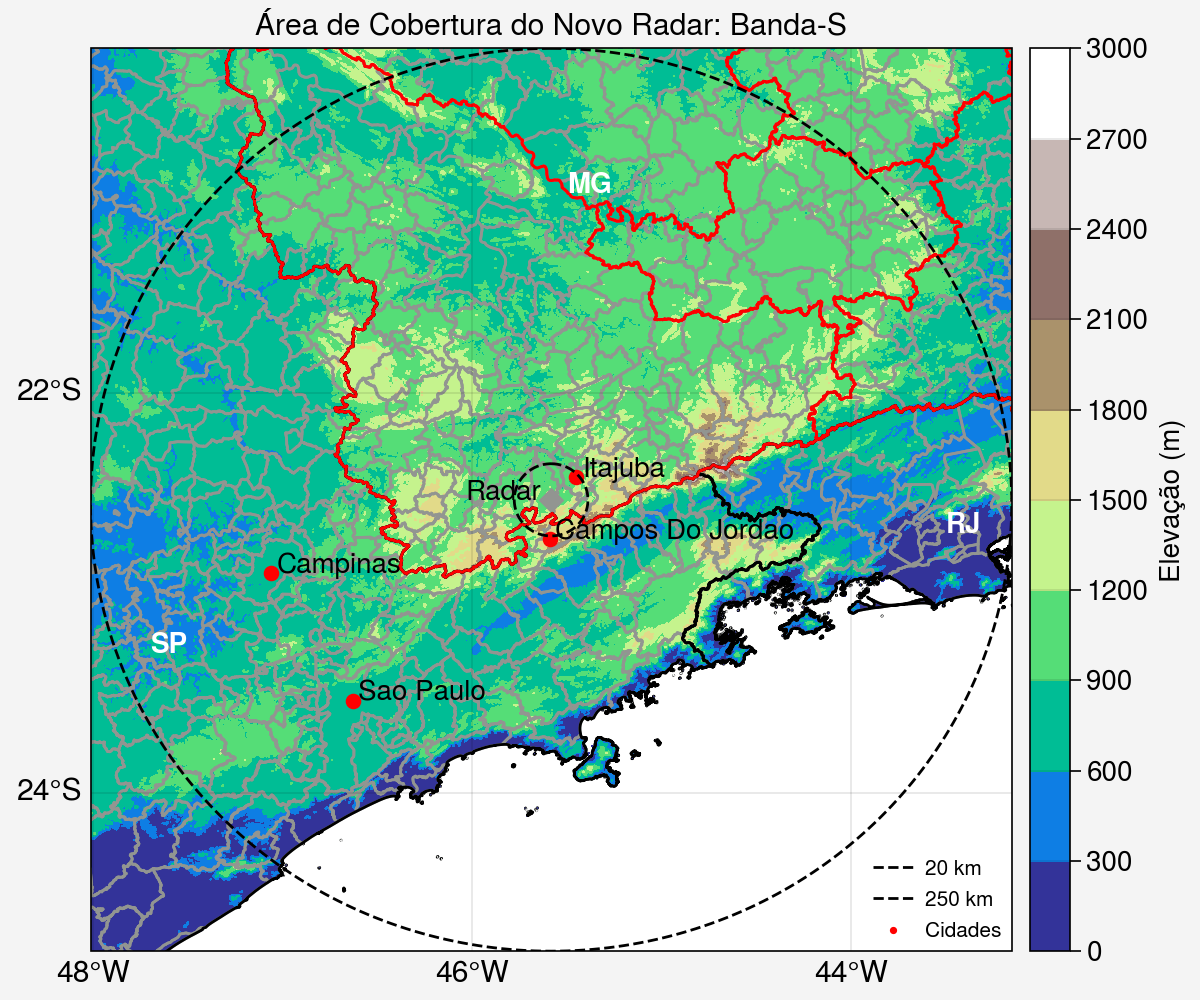

In [6]:
%%time
#========================================================================================================================#
#                                             INFORMAÇÕES DO RADAR
#========================================================================================================================#
# Latitude e longitude do radar
lon_radar, lat_radar = -45.5825, -22.5344

#========================================================================================================================#
#                                             LEITURA DO DADO DE RELEVO
#========================================================================================================================#

topo = Topography(dem_type="SRTMGL3",
                  south=latmin,
                  north=latmax,
                  west=lonmin,
                  east=lonmax,
                  output_format="GTiff",
                  cache_dir=".")

ds = topo.load()

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
#--------------------------#
#     plota relevo
#--------------------------#
# moldura da figura
fig, ax = uplt.subplots(figsize=(6.0, 5), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=2, lonlines=2,
          latlim=(latmin, latmax),
          lonlim=(lonmin, lonmax),
          title='Área de Cobertura do Novo Radar: Banda-S',
          small='15px', large='15px')

# plota mapa de relevo
map1 = ax.contourf(ds['x'],
                   ds['y'],
                   ds[0,:,:],
                   cmap='terrain',
                   vmin=0)

#--------------------------#
#     plota aneis
#--------------------------#
# nome "Radar"
ax.scatter(lon_radar, lat_radar, transform=ccrs.PlateCarree(), marker='D', s=35, color='gray')
plt.text(lon_radar-0.45, lat_radar,'Radar', size=10)

# plota os aneis de distância do radar
evm_plota_aneis_em_geral([20], lon_radar, lat_radar, 'black', label='20 km', linestyle='--', largura=1.)
evm_plota_aneis_em_geral([250], lon_radar, lat_radar, 'black', label='250 km', linestyle='--', largura=1.)

#--------------------------#
#     plota shapefiles
#--------------------------#
# MUNÍCIPIOS
muni_mg = salem.read_shapefile(f'{dir}/shapefiles/MG_Municipios_2023/MG_Municipios_2023.shp')
muni_rj = salem.read_shapefile(f'{dir}/shapefiles/RJ_Municipios_2023/RJ_Municipios_2023.shp')
muni_sp = salem.read_shapefile(f'{dir}/shapefiles/SP_Municipios_2023/SP_Municipios_2023.shp')

muni_mg.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax)
muni_rj.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax)
muni_sp.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax)

# ESTADOS
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp')
estados_selecionado = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == 'SP') |
                                          (estados_brasil['SIGLA_UF'] == 'MG') |
                                          (estados_brasil['SIGLA_UF'] == 'RJ') ]
estados_selecionado.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=1, ax=ax)

# MESOREGIOES
meso_mg = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/refs/heads/main/mesoregioes_MG/MG_Mesorregioes_2020.shp')
meso_mg.plot(edgecolor='red', facecolor='none', linewidth=1, alpha=1, ax=ax)

#--------------------------#
#     plota siglas
#--------------------------#
ax.annotate('SP', xy=(-47.7, -23.3), fontsize=10, color='white', weight='bold')
ax.annotate('MG', xy=(-45.5, -21.0), fontsize=10, color='white', weight='bold')
ax.annotate('RJ', xy=(-43.5, -22.7), fontsize=10, color='white', weight='bold')
#ax.annotate('Oceano Atlântico', xy=(-46.0, -25.42), fontsize=10, color='black')

#--------------------------#
#     plota cidades
#--------------------------#
# lendo o arquivo CSV
df = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')

# removendo espaço em branco
df['cidade'] = df['cidade'].str.strip()

# removendo espaço em branco
df['uf'] = df['uf'].str.strip()

# listas com os nomes das cidades que serão plotadas no mapa
cidades = ['ITAJUBA', 'SAO PAULO', 'CAMPINAS', 'CAMPOS DO JORDAO']

# cria um dataframe vazio
df_cidades = pd.DataFrame()

# loop da lista de cidades
for cidade in cidades:

    # seleciona a cidade
    df_atual = df[ df['cidade'] == cidade][['lat', 'lon']]

    # insere a latitude e longitude da cidade no DataFrame df_cidades
    df_cidades = pd.concat([df_cidades, df_atual])

# acrescenta uma coluna com os nomes das cidades
df_cidades['cidade'] = cidades

# plota a localização das cidades com os nomes
ax.scatter(df_cidades['lon'].values, df_cidades['lat'].values, transform=ccrs.PlateCarree(), marker='o', s=25, color='red', label='Cidades') # localização das cidades
for ilon, ilat, icidade in zip( list(df_cidades['lon']), list(df_cidades['lat']), list(df_cidades['cidade']) ): plt.text(ilon+0.03, ilat, icidade.title(), fontsize=10) # nome das cidades

#--------------------------#
# plota barra de cor/legenda
#--------------------------#
fig.colorbar(map1, loc='right', label='Elevação (m)', ticklabelsize=10, labelsize=10, space=-2.9)

# adiciona legenda
ax.legend(loc='lr', ncols=1, frameon=False, prop={'size':7.5}, markerscale=0.4)

#--------------------------#
#      salva figura
#--------------------------#
fig.save(f'{dir}/output/codigo_1/Fig_2a_radar_BandaS_e_relevo.jpg', dpi=300)

# Radar do LNA - BANDA-X + Relevo

## Calcula os limites da área do Radar

In [7]:
import geopy
from geopy import distance
import numpy as np

origin = geopy.Point(-22.5344, -45.5825)

# latmax
destination = distance.distance(kilometers=100).destination(origin, 0)
latmax, _ = destination.latitude, destination.longitude

# lonmax
destination = distance.distance(kilometers=100).destination(origin, 90)
_, lonmax= destination.latitude, destination.longitude

# latmin
destination = distance.distance(kilometers=100).destination(origin, 180)
latmin, _ = destination.latitude, destination.longitude

# lonmin
destination = distance.distance(kilometers=100).destination(origin, 270)
_, lonmin= destination.latitude, destination.longitude

print(lonmin, lonmax, latmin, latmax)

-46.55457956381259 -44.61042043618742 -23.43738485938424 -21.631313869493024


## Plota Figura

CPU times: user 13.7 s, sys: 477 ms, total: 14.2 s
Wall time: 26.7 s


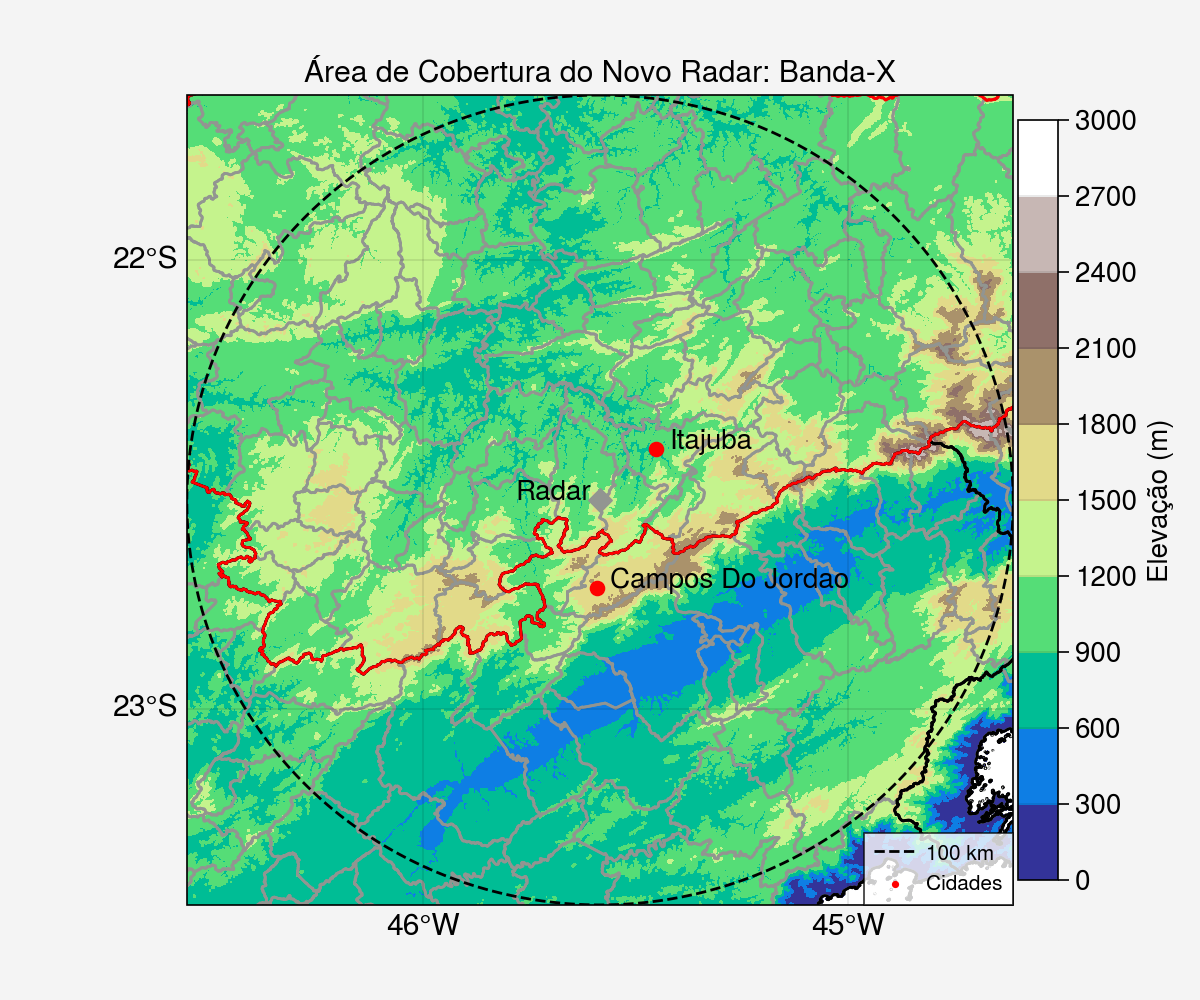

In [8]:
%%time
#========================================================================================================================#
#                                             INFORMAÇÕES DO RADAR
#========================================================================================================================#
# Latitude e longitude do radar
lon_radar, lat_radar = -45.5825, -22.5344

#========================================================================================================================#
#                                             LEITURA DO DADO DE RELEVO
#========================================================================================================================#
topo = Topography(dem_type="SRTMGL3",
                  south=latmin,
                  north=latmax,
                  west=lonmin,
                  east=lonmax,
                  output_format="GTiff",
                  cache_dir=".")

ds = topo.load()
#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
#--------------------------#
#     plota relevo
#--------------------------#
# moldura da figura
fig, ax = uplt.subplots(figsize=(6.0, 5), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=1, lonlines=1,
          latlim=(latmin, latmax),
          lonlim=(lonmin, lonmax),
          title='Área de Cobertura do Novo Radar: Banda-X',
          small='15px', large='15px')

# plota mapa de relevo
map1 = ax.contourf(ds['x'],
                   ds['y'],
                   ds[0,:,:],
                   cmap='terrain',
                   vmin=0)

#--------------------------#
#     plota aneis
#--------------------------#
# nome "Radar"
ax.scatter(lon_radar, lat_radar, transform=ccrs.PlateCarree(), marker='D', s=35, color='gray')
plt.text(lon_radar-0.20, lat_radar,'Radar', size=10)

# plota os aneis de distância do radar
evm_plota_aneis_em_geral([100], lon_radar, lat_radar, 'black', label='100 km', linestyle='--', largura=1.)

#--------------------------#
#     plota shapefiles
#--------------------------#
# MUNÍCIPIOS
muni_mg = salem.read_shapefile(f'{dir}/shapefiles/MG_Municipios_2023/MG_Municipios_2023.shp')
muni_rj = salem.read_shapefile(f'{dir}/shapefiles/RJ_Municipios_2023/RJ_Municipios_2023.shp')
muni_sp = salem.read_shapefile(f'{dir}/shapefiles/SP_Municipios_2023/SP_Municipios_2023.shp')

muni_mg.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax)
muni_rj.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax)
muni_sp.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax)

# ESTADOS
estados_brasil = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/refs/heads/main/estados_do_brasil/BR_UF_2019.shp')
estados_selecionado = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == 'SP') |
                                          (estados_brasil['SIGLA_UF'] == 'MG') |
                                          (estados_brasil['SIGLA_UF'] == 'RJ') ]
estados_selecionado.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=1, ax=ax)

# MESOREGIOES
meso_mg = salem.read_shapefile('https://github.com/evmpython/shapefile/raw/refs/heads/main/mesoregioes_MG/MG_Mesorregioes_2020.shp')
meso_mg.plot(edgecolor='red', facecolor='none', linewidth=1, alpha=1, ax=ax)

#--------------------------#
#     plota siglas
#--------------------------#
ax.annotate('SP', xy=(-47.7, -23.3), fontsize=10, color='white', weight='bold')
ax.annotate('MG', xy=(-45.5, -21.0), fontsize=10, color='white', weight='bold')
ax.annotate('RJ', xy=(-43.5, -22.7), fontsize=10, color='white', weight='bold')

#--------------------------#
#     plota cidades
#--------------------------#
# lendo o arquivo CSV
df = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')

# removendo espaço em branco
df['cidade'] = df['cidade'].str.strip()

# removendo espaço em branco
df['uf'] = df['uf'].str.strip()

# listas com os nomes das cidades que serão plotadas no mapa
cidades = ['ITAJUBA', 'CAMPOS DO JORDAO']

# cria um dataframe vazio
df_cidades = pd.DataFrame()

# loop da lista de cidades
for cidade in cidades:

    # seleciona a cidade
    df_atual = df[ df['cidade'] == cidade][['lat', 'lon']]

    # insere a latitude e longitude da cidade no DataFrame df_cidades
    df_cidades = pd.concat([df_cidades, df_atual])

# acrescenta uma coluna com os nomes das cidades
df_cidades['cidade'] = cidades

# plota a localização das cidades com os nomes
ax.scatter(df_cidades['lon'].values, df_cidades['lat'].values, transform=ccrs.PlateCarree(), marker='o', s=25, color='red', label='Cidades') # localização das cidades
for ilon, ilat, icidade in zip( list(df_cidades['lon']), list(df_cidades['lat']), list(df_cidades['cidade']) ): plt.text(ilon+0.03, ilat, icidade.title(), fontsize=10) # nome das cidades

#--------------------------#
# plota barra de cor/legenda
#--------------------------#
fig.colorbar(map1, loc='right', label='Elevação (m)', ticklabelsize=10, labelsize=10, space=0.2, length=0.78)

# adiciona legenda
ax.legend(loc='lr', ncols=1, frameon=True, prop={'size':7.5}, markerscale=0.4)

#--------------------------#
#      salva figura
#--------------------------#
fig.save(f'{dir}/output/codigo_1/Fig_2b_radar_BandaX_e_relevo.jpg', dpi=300)

## Municípios dentro da área de cobertura do radar

In [9]:
df_cidades = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')
df_cidades

,id,lat,lon,cidade,uf
0,1,-9.82,-66.88,ACRELANDIA,AC
1,2,-10.94,-69.56,ASSIS BRASIL,AC
2,3,-11.01,-68.74,BRASILEIA,AC
3,4,-9.83,-67.95,BUJARI,AC
4,5,-10.57,-67.67,CAPIXABA,AC
...,...,...,...,...,...
5504,5505,-6.32,-47.41,TOCANTINOPOLIS,TO
5505,5506,-8.97,-48.18,TUPIRAMA,TO
5506,5507,-8.39,-48.11,TUPIRATINS,TO
5507,5508,-6.84,-47.96,WANDERLANDIA,TO


In [10]:
# leitura da tabela com a localização das cidades
df_cidades = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')

# calcula a distância da cidade ao radar
dis = (np.sqrt( (df_cidades['lat'].values - lat_radar)**2 +  (df_cidades['lon'].values - lon_radar)**2 ) ) * 111.195

# adiciona a colunas com as distâncias no DataFrame
df_cidades['distancia'] = dis

# seleciona as cidades que estão <= 250 km do radar
df_cidades_radar = df_cidades[ df_cidades['distancia'] <= 250]
display(df_cidades_radar)

# salva em netcdf
df_cidades_radar.to_csv('cidades_radar.csv', sep=';')

,id,lat,lon,cidade,uf,distancia
1344,1345,-20.94,-45.39,AGUANIL,MG,178.576802
1348,1349,-21.97,-44.60,AIURUOCA,MG,125.992012
1349,1350,-22.17,-44.64,ALAGOA,MG,112.361632
1350,1351,-22.20,-46.61,ALBERTINA,MG,120.151310
1352,1353,-21.42,-45.94,ALFENAS,MG,130.135856
...,...,...,...,...,...,...
5359,5360,-21.83,-46.89,VARGEM GRANDE DO SUL,SP,165.143691
5360,5361,-23.60,-47.02,VARGEM GRANDE PAULISTA,SP,198.971005
5361,5362,-23.21,-46.82,VARZEA PAULISTA,SP,156.774761
5363,5364,-23.03,-46.97,VINHEDO,SP,163.829734


In [11]:
df_cidades_radar['uf'].value_counts()

,count
uf,
MG,198
SP,194
RJ,29


# Radar do LNA - Comparando Banda-S com X

## Calcula os limites da área do Radar

In [12]:
# Latitude e longitude do radar
lon_radar, lat_radar = -45.5825, -22.5344

# localização do radar
origin = geopy.Point(lat_radar, lon_radar)

#=========================================================================================#
#                                         BANDA-S
#=========================================================================================#
# latmax
destination = distance.distance(kilometers=250).destination(origin, 0)
latmax_bandaS, _ = destination.latitude, destination.longitude

# lonmax
destination = distance.distance(kilometers=250).destination(origin, 90)
_, lonmax_bandaS = destination.latitude, destination.longitude

# latmin
destination = distance.distance(kilometers=250).destination(origin, 180)
latmin_bandaS, _ = destination.latitude, destination.longitude

# lonmin
destination = distance.distance(kilometers=250).destination(origin, 270)
_, lonmin_bandaS = destination.latitude, destination.longitude

print('Banda-S:', lonmin_bandaS, lonmax_bandaS, latmin_bandaS, latmax_bandaS)

#=========================================================================================#
#                                         BANDA-X
#=========================================================================================#
# latmax
destination = distance.distance(kilometers=100).destination(origin, 0)
latmax_bandaX, _ = destination.latitude, destination.longitude

# lonmax
destination = distance.distance(kilometers=100).destination(origin, 90)
_, lonmax_bandaX = destination.latitude, destination.longitude

# latmin
destination = distance.distance(kilometers=100).destination(origin, 180)
latmin_bandaX, _ = destination.latitude, destination.longitude

# lonmin
destination = distance.distance(kilometers=100).destination(origin, 270)
_, lonmin_bandaX = destination.latitude, destination.longitude

print('Banda-X:', lonmin_bandaX, lonmax_bandaX, latmin_bandaX, latmax_bandaX)

Banda-S: -48.012519205229005 -43.152480794771 -24.79166547379924 -20.276501861658723
Banda-X: -46.55457956381259 -44.61042043618742 -23.43738485938424 -21.631313869493024


## Municípios dentro da área de cobertura do radar

In [13]:
# leitura da tabela com a localização das cidades
df_cidades = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')

# calcula a distância da cidade ao radar
dis = (np.sqrt( (df_cidades['lat'].values - lat_radar)**2 +  (df_cidades['lon'].values - lon_radar)**2 ) ) * 111.195

# adiciona a colunas com as distâncias no DataFrame
df_cidades['distancia'] = dis

# seleciona as cidades que estão <= 250 km do radar - BANDA-S
df_cidades_bandaS = df_cidades[ df_cidades['distancia'] <= 250]

# seleciona as cidades que estão <= 250 km do radar - BANDA-X
df_cidades_bandaX = df_cidades[ df_cidades['distancia'] <= 100]

# salva em CSV
df_cidades_bandaS.to_csv('cidades_radar_bandaS.csv', sep=';')
df_cidades_bandaX.to_csv('cidades_radar_bandaX.csv', sep=';')

# quantidade de cidades por tipo de radar
muni_bandaS = df_cidades_bandaS.shape[0]
muni_bandaX = df_cidades_bandaX.shape[0]

# quantidade de cidades por tipo de radar
muni_estado_bandaS = df_cidades_bandaS['uf'].value_counts()
muni_estado_bandaX = df_cidades_bandaX['uf'].value_counts()

print(muni_bandaS, muni_bandaX)
print(muni_estado_bandaS)
print(muni_estado_bandaX)

421 102
uf
MG    198
SP    194
RJ     29
Name: count, dtype: int64
uf
MG    68
SP    34
Name: count, dtype: int64


In [14]:
df_cidades

,id,lat,lon,cidade,uf,distancia
0,1,-9.82,-66.88,ACRELANDIA,AC,2758.083151
1,2,-10.94,-69.56,ASSIS BRASIL,AC,2961.527262
2,3,-11.01,-68.74,BRASILEIA,AC,2876.237890
3,4,-9.83,-67.95,BUJARI,AC,2860.342702
4,5,-10.57,-67.67,CAPIXABA,AC,2793.196541
...,...,...,...,...,...,...
5504,5505,-6.32,-47.41,TOCANTINOPOLIS,TO,1814.375748
5505,5506,-8.97,-48.18,TUPIRAMA,TO,1535.698979
5506,5507,-8.39,-48.11,TUPIRATINS,TO,1597.699613
5507,5508,-6.84,-47.96,WANDERLANDIA,TO,1765.049263


In [15]:
df_cidades_bandaS

,id,lat,lon,cidade,uf,distancia
1344,1345,-20.94,-45.39,AGUANIL,MG,178.576802
1348,1349,-21.97,-44.60,AIURUOCA,MG,125.992012
1349,1350,-22.17,-44.64,ALAGOA,MG,112.361632
1350,1351,-22.20,-46.61,ALBERTINA,MG,120.151310
1352,1353,-21.42,-45.94,ALFENAS,MG,130.135856
...,...,...,...,...,...,...
5359,5360,-21.83,-46.89,VARGEM GRANDE DO SUL,SP,165.143691
5360,5361,-23.60,-47.02,VARGEM GRANDE PAULISTA,SP,198.971005
5361,5362,-23.21,-46.82,VARZEA PAULISTA,SP,156.774761
5363,5364,-23.03,-46.97,VINHEDO,SP,163.829734


In [16]:
df_cidades_bandaS

,id,lat,lon,cidade,uf,distancia
1344,1345,-20.94,-45.39,AGUANIL,MG,178.576802
1348,1349,-21.97,-44.60,AIURUOCA,MG,125.992012
1349,1350,-22.17,-44.64,ALAGOA,MG,112.361632
1350,1351,-22.20,-46.61,ALBERTINA,MG,120.151310
1352,1353,-21.42,-45.94,ALFENAS,MG,130.135856
...,...,...,...,...,...,...
5359,5360,-21.83,-46.89,VARGEM GRANDE DO SUL,SP,165.143691
5360,5361,-23.60,-47.02,VARGEM GRANDE PAULISTA,SP,198.971005
5361,5362,-23.21,-46.82,VARZEA PAULISTA,SP,156.774761
5363,5364,-23.03,-46.97,VINHEDO,SP,163.829734


In [17]:
df_cidades_bandaX

,id,lat,lon,cidade,uf,distancia
1420,1421,-22.47,-46.14,BOM REPOUSO,MG,62.403443
1425,1426,-22.27,-46.16,BORDA DA MATA,MG,70.625337
1431,1432,-22.47,-45.60,BRASOPOLIS,MG,7.420640
1434,1435,-22.44,-46.35,BUENO BRANDAO,MG,85.985276
1442,1443,-22.35,-45.77,CACHOEIRA DE MINAS,MG,29.242300
...,...,...,...,...,...,...
5286,5287,-23.22,-45.31,SAO LUIS DO PARAITINGA,SP,82.036263
5306,5307,-22.66,-44.85,SILVEIRAS,SP,82.639030
5331,5332,-23.02,-45.55,TAUBATE,SP,54.117089
5340,5341,-22.95,-45.54,TREMEMBE,SP,46.453647


## Plota Figura

### - Leitura relevo

In [18]:
# importa bibloteca
from bmi_topography import Topography
import time
import warnings
warnings.filterwarnings("ignore")

# carrega topografia para área do banda-S
topo = Topography(dem_type="SRTMGL3",
                  south=latmin_bandaS,
                  north=latmax_bandaS,
                  west=lonmin_bandaS,
                  east=lonmax_bandaS,
                  output_format="GTiff",
                  cache_dir=".")

ds_bandaS = topo.load()

# carrega topografia para área do banda-X
topo = Topography(dem_type="SRTMGL3",
                  south=latmin_bandaX,
                  north=latmax_bandaX,
                  west=lonmin_bandaX,
                  east=lonmax_bandaX,
                  output_format="GTiff",
                  cache_dir=".")

ds_bandaX = topo.load()

### - Plota figura

CPU times: user 1min 3s, sys: 2.24 s, total: 1min 5s
Wall time: 1min 7s


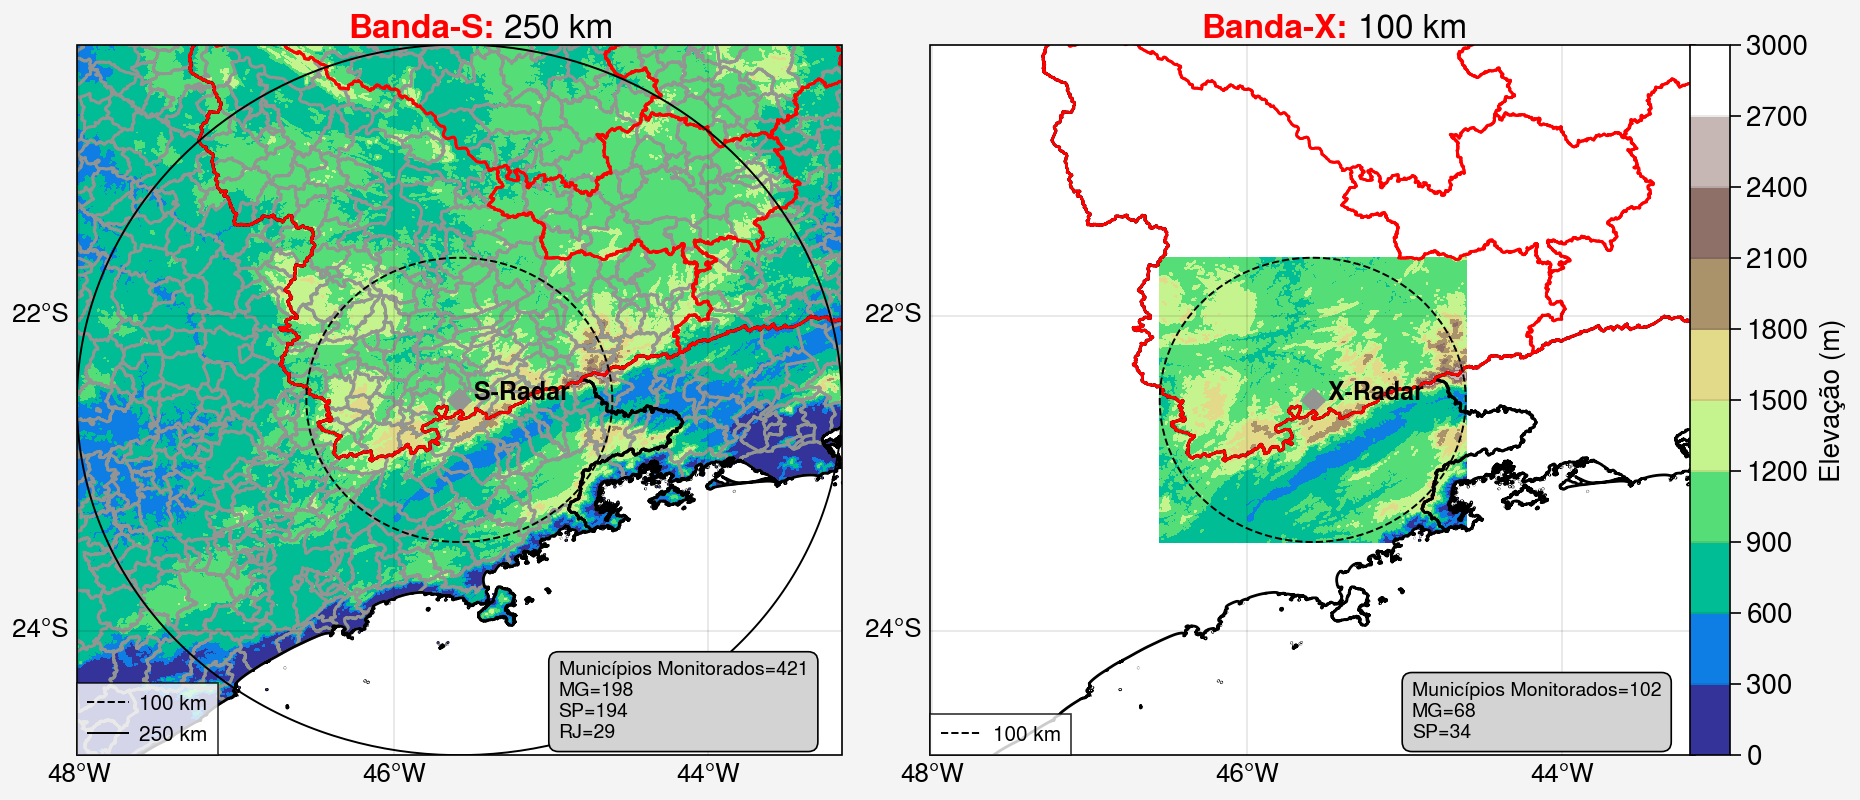

In [19]:
%%time
#========================================================================================================================#
#                                                 PLOTA FIGURA
#========================================================================================================================#
#--------------------------------------------------------#
#               CONFIGURAÇÕES DO GRÁFICO
#--------------------------------------------------------#
# moldura da figura
fig, ax = uplt.subplots(ncols=2, nrows=1, figsize=(9.3,4), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=2, lonlines=2,
          latlim=(latmin_bandaS, latmax_bandaS),
          lonlim=(lonmin_bandaS, lonmax_bandaS),
          small='13px', large='5px')

#--------------------------------------------------------#
#                      BANDA-S
#--------------------------------------------------------#
# plota mapa
map1 = ax[0].contourf(ds_bandaS['x'],
                      ds_bandaS['y'],
                      ds_bandaS[0,:,:],
                      cmap='terrain',
                      vmin=0)

# plota titulo de cada figura
#ax[0].format(title='Banda-S: 250 km', labels=[True, False, True, False], titleloc='c', titlecolor='bright red', titleweight='bold', fontsize=10)
ax[0].text(0.45, 1.0,
           'Banda-S:',
           transform=ax[0].transAxes,
           ha='center', va='bottom', fontsize=12, color='red', fontweight='bold')
ax[0].text(0.63, 1.0,
           '250 km',
           transform=ax[0].transAxes,
           ha='center', va='bottom', fontsize=12, color='black')

# plota shapefiles: MUNÍCIPIOS
#muni_mg = salem.read_shapefile('shapefiles/MG_Municipios_2023/MG_Municipios_2023.shp')
#muni_rj = salem.read_shapefile('shapefiles/RJ_Municipios_2023/RJ_Municipios_2023.shp')
#muni_sp = salem.read_shapefile('shapefiles/SP_Municipios_2023/SP_Municipios_2023.shp')
#muni_mg.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax[0])
#muni_rj.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax[0])
#muni_sp.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax[0])

shapefile = list(shpreader.Reader(f'{dir}/shapefiles/MG_Municipios_2023/MG_Municipios_2023.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1)

shapefile = list(shpreader.Reader(f'{dir}/shapefiles/RJ_Municipios_2023/RJ_Municipios_2023.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1)

shapefile = list(shpreader.Reader(f'{dir}/shapefiles/SP_Municipios_2023/SP_Municipios_2023.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='gray', facecolor='none', linewidth=1.0, alpha=1)

# plota shapefiles: ESTADOS
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1)

# plota shapefiles: MESOREGIOES
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/mesoregioes_MG/MG_Mesorregioes_2020.shp').geometries())
ax[0].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=1.0, alpha=1)

# localização do radar
ax[0].scatter(lon_radar, lat_radar, transform=ccrs.PlateCarree(), marker='D', s=35, color='gray')
ax[0].text(lon_radar+0.05, lat_radar,' S-Radar', size=9, fontweight='bold')

# aneis do radar
evm_plota_aneis_em_geral_painel([100], lon_radar, lat_radar, 'black', label='100 km', linestyle='--', largura=.7, axx=0)
evm_plota_aneis_em_geral_painel([250], lon_radar, lat_radar, 'black', label='250 km', linestyle='-', largura=.7, axx=0)

# legenda
ax[0].legend(loc='ll', ncols=1, frameon=True, prop={'size':7.5}, markerscale=0.4)

# quantidade de cidades
leg1 = f'{muni_estado_bandaS.index[0].strip()}={muni_estado_bandaS.values[0]}'
leg2 = f'{muni_estado_bandaS.index[1].strip()}={muni_estado_bandaS.values[1]}'
leg3 = f'{muni_estado_bandaS.index[2].strip()}={muni_estado_bandaS.values[2]}'
tot  = muni_estado_bandaS.values.sum()

ax[0].text(lonmax_bandaS-1.8,
           latmin_bandaS+0.11,
           f'Municípios Monitorados={tot}\n{leg1}\n{leg2}\n{leg3}',
           size=7,
           bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))

#--------------------------------------------------------#
#                       BANDA-X
#--------------------------------------------------------#
# plota mapa
map1 = ax[1].contourf(ds_bandaX['x'],
                      ds_bandaX['y'],
                      ds_bandaX[0,:,:],
                      cmap='terrain',
                      vmin=0)

# plota titulo de cada figura
#ax[1].format(title='Banda-X: 100 km', labels=[False, False, True, False], titleloc='c', titlecolor='bright red', titleweight='bold', fontsize=10)
ax[1].text(0.45, 1.0,
           'Banda-X:',
           transform=ax[1].transAxes,
           ha='center', va='bottom', fontsize=12, color='red', fontweight='bold')
ax[1].text(0.63, 1.0,
           '100 km',
           transform=ax[1].transAxes,
           ha='center', va='bottom', fontsize=12, color='black')

# plota shapefiles: MUNÍCIPIOS
#muni_mg = salem.read_shapefile('shapefiles/MG_Municipios_2023/MG_Municipios_2023.shp')
#muni_rj = salem.read_shapefile('shapefiles/RJ_Municipios_2023/RJ_Municipios_2023.shp')
#muni_sp = salem.read_shapefile('shapefiles/SP_Municipios_2023/SP_Municipios_2023.shp')

#muni_mg.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax[1])
#muni_rj.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax[1])
#muni_sp.plot(edgecolor='gray', facecolor='none', linewidth=1, alpha=1, ax=ax[1])

# plota shapefiles: ESTADOS
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/main/estados_do_brasil/BR_UF_2019.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=1.0, alpha=1)

# plota shapefiles: MESOREGIOES
shapefile = list(shpreader.Reader('https://github.com/evmpython/shapefile/raw/refs/heads/main/mesoregioes_MG/MG_Mesorregioes_2020.shp').geometries())
ax[1].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=1.0, alpha=1)

# localização do radar
ax[1].scatter(lon_radar, lat_radar, transform=ccrs.PlateCarree(), marker='D', s=35, color='gray')
ax[1].text(lon_radar+0.05, lat_radar,' X-Radar', size=9, fontweight='bold')

# aneis do radar
evm_plota_aneis_em_geral_painel([100], lon_radar, lat_radar, 'black', label='100 km', linestyle='--', largura=.7, axx=1)

# legenda
ax[1].legend(loc='ll', ncols=1, frameon=True, prop={'size':7.5}, markerscale=0.4)

# quantidade de cidades
leg1 = f'{muni_estado_bandaX.index[0].strip()}={muni_estado_bandaX.values[0]}'
leg2 = f'{muni_estado_bandaX.index[1].strip()}={muni_estado_bandaX.values[1]}'
tot  = muni_estado_bandaX.values.sum()

ax[1].text(lonmax_bandaS-1.8,
           latmin_bandaS+0.11,
           f'Municípios Monitorados={tot}\n{leg1}\n{leg2}',
           size=7,
           bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))

#--------------------------------------------------------#
#             BARRA DE CORES E SALVA FIGURA
#--------------------------------------------------------#
fig.colorbar(map1, loc='right', label='Elevação (m)', ticklabelsize=10, labelsize=10, space=-1.8, length=0.999, width=0.2)
fig.save(f'{dir}/output/codigo_1/Fig_3_radar_LNA_bandaXeS.jpg', dpi=300)